# Kepler-38 lightcurve preparation for new CB search trials

In [10]:
import numpy as np
import matplotlib.pyplot as p
import kepselfflatten as ksf
from astropy.io import fits

%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
#take in lightcurve data

lc = np.genfromtxt('kep38_stitched.txt')
time = lc[:,0]
flux = lc[:,1]
err = lc[:,2]

nancheck = np.isnan(time) | np.isnan(flux) | np.isnan(err)
time, flux, err  = time[~nancheck], flux[~nancheck], err[~nancheck]
sort = np.argsort(time)
time, flux, err = time[sort],flux[sort],err[sort]


<IPython.core.display.Javascript object>


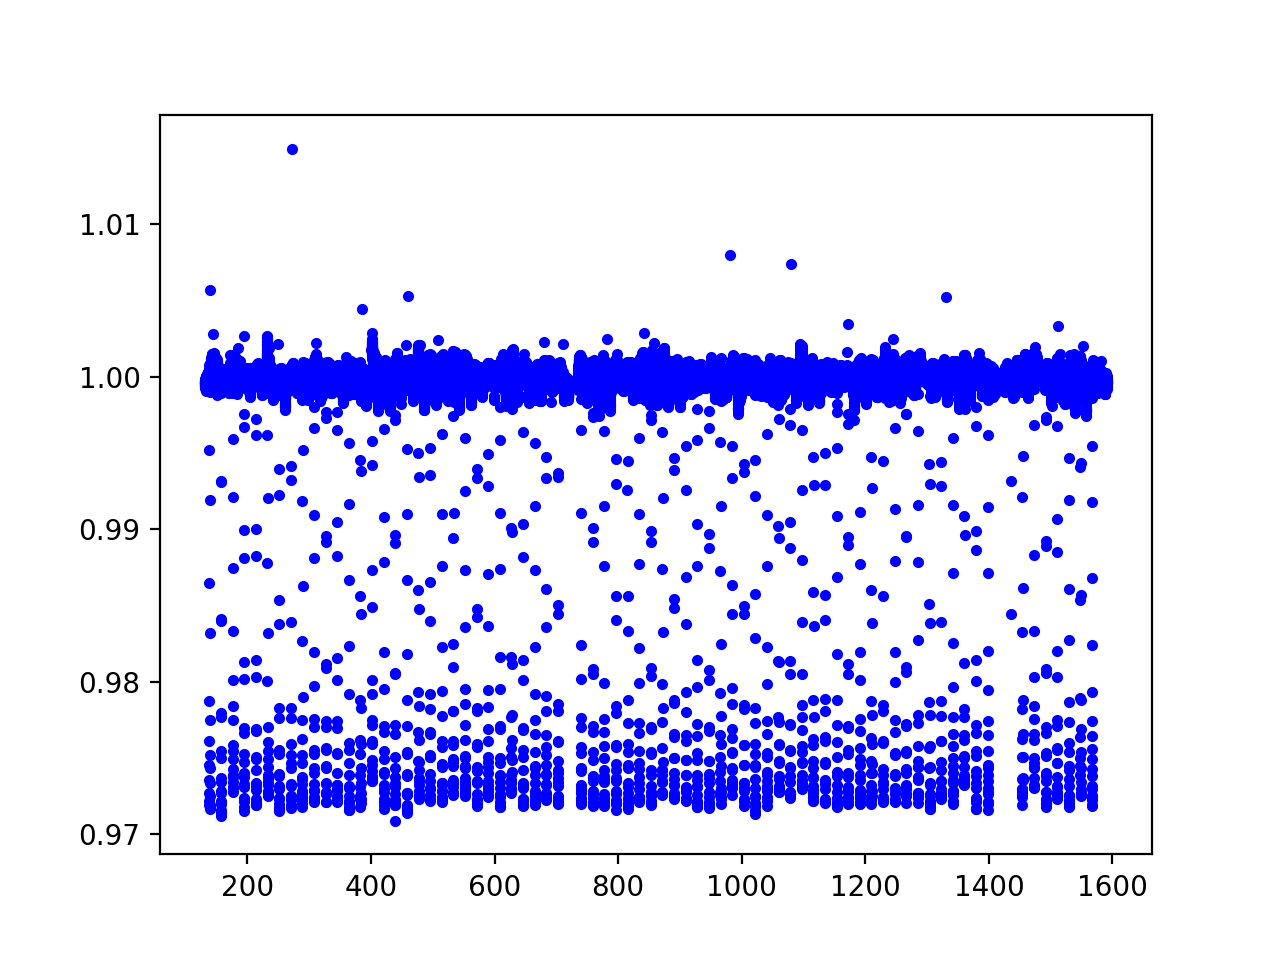

[ 131.51270225  131.53313676  131.55357118 ... 1590.96088216 1590.98131654
 1591.00175111]
131.51270224674954


In [12]:
p.figure()
p.plot(time,flux,'b.')
#p.plot(time,sapflux,'r.')
#quarter-stitched, but otherwise messy, lightcurve
print(time)
print(np.min(time))
#p.figure()
#p.plot(time,sapflux,'b.')



In [13]:
#step 1 - remove activity trend and discontinuities
winsize = 3.
stepsize = 0.1
polydegree = 3
niter = 10
sigmaclip = 5
gapthreshold = 0.4
plot = False
transitcut = 2 #number of periodic events to cut
t_per = [18.79537,18.79537]  #binary period - will ignore primary eclipses 
                    
t_t0 = [54970 - 54833 -17.127434, 9.370064 + 54970 - 54833 -17.127434 ]
t_dur = [0.45, 0.4]

lcf =   ksf.Kepflatten(time-time[0],flux,err,np.zeros(len(time)),
                       winsize,stepsize,polydegree,niter,sigmaclip,
                       gapthreshold,time[0],plot,transitcut,
                       t_per,t_t0,t_dur)        


<IPython.core.display.Javascript object>


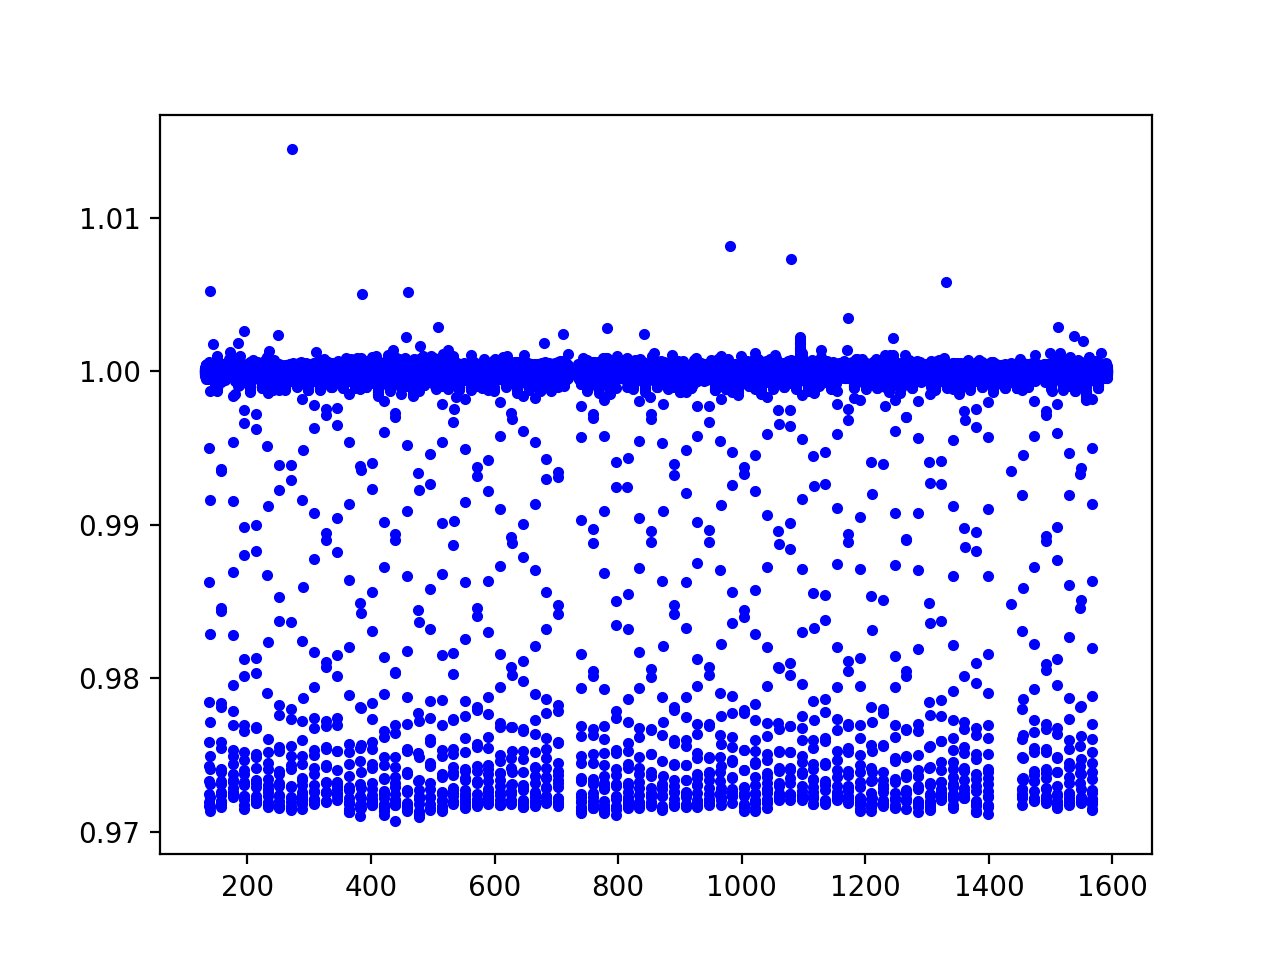

<IPython.core.display.Javascript object>


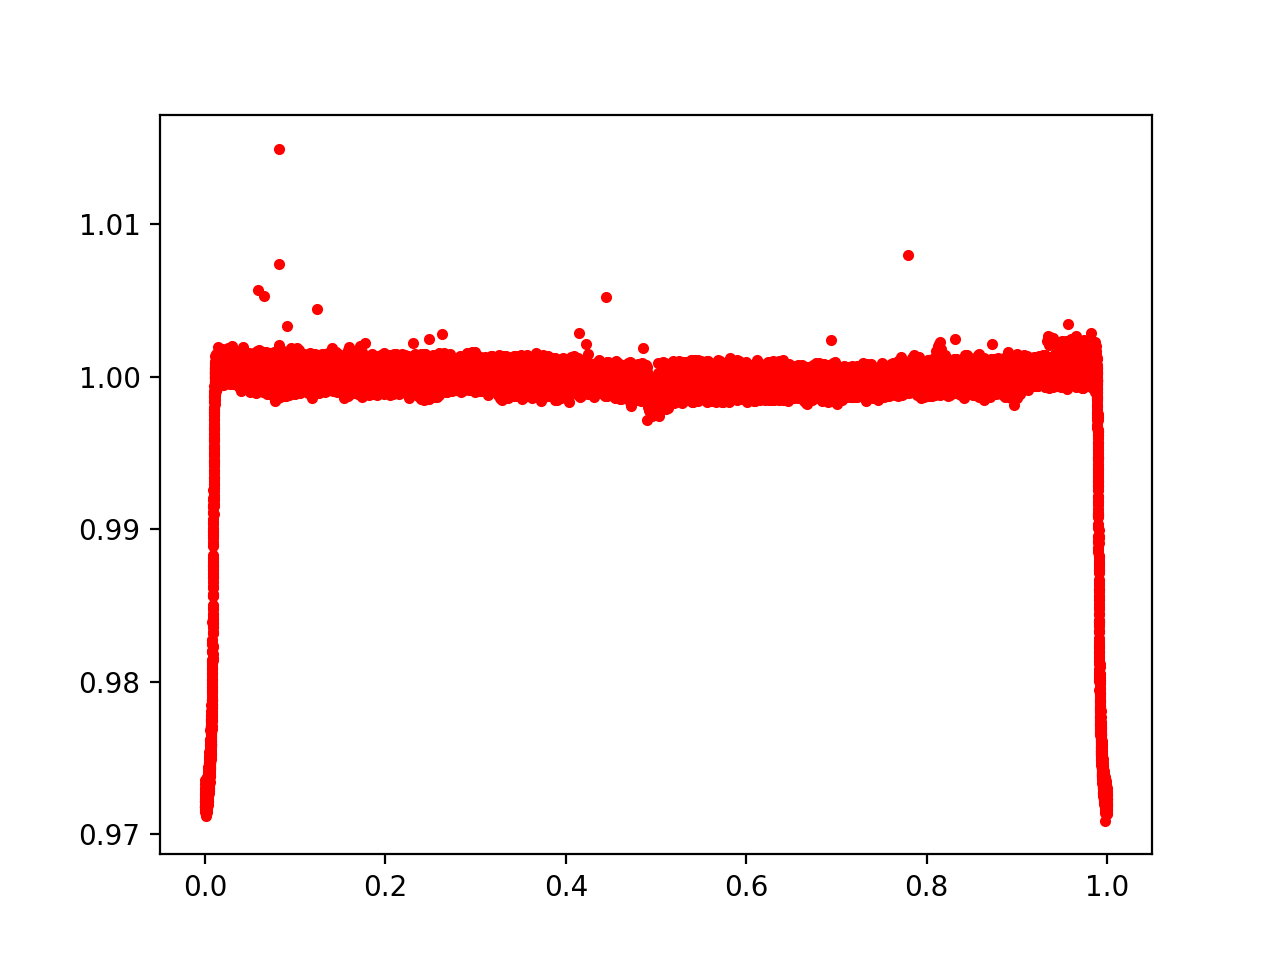

<IPython.core.display.Javascript object>


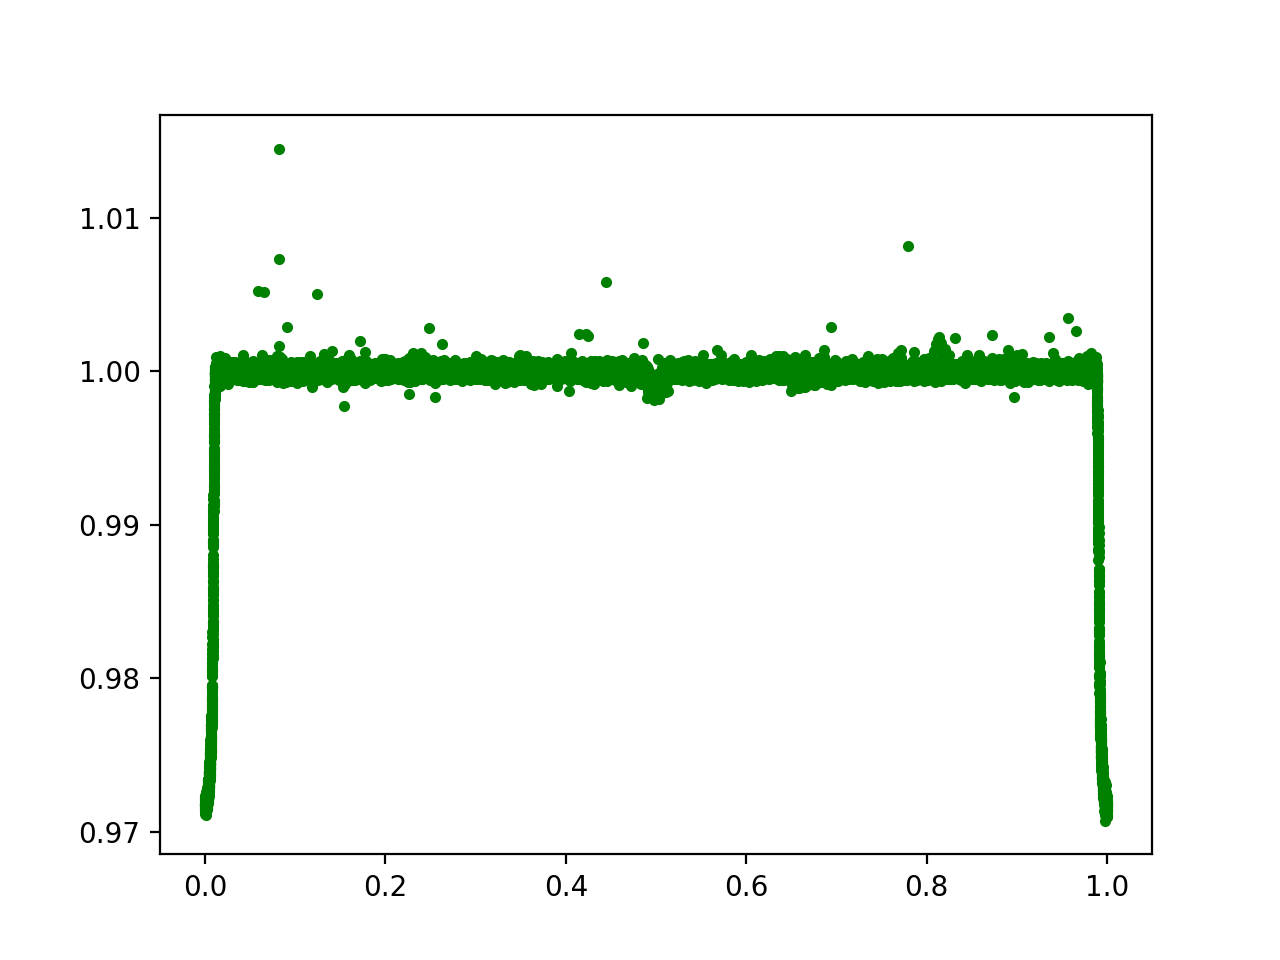

In [14]:
p.figure()
p.plot(lcf[:,0],lcf[:,1],'b.')
phase = np.mod(lcf[:,0]-t_t0[0],t_per[0])/t_per[0]
p.figure()
p.plot(phase,flux,'r.')
p.figure()
p.plot(phase,lcf[:,1],'g.')


<IPython.core.display.Javascript object>


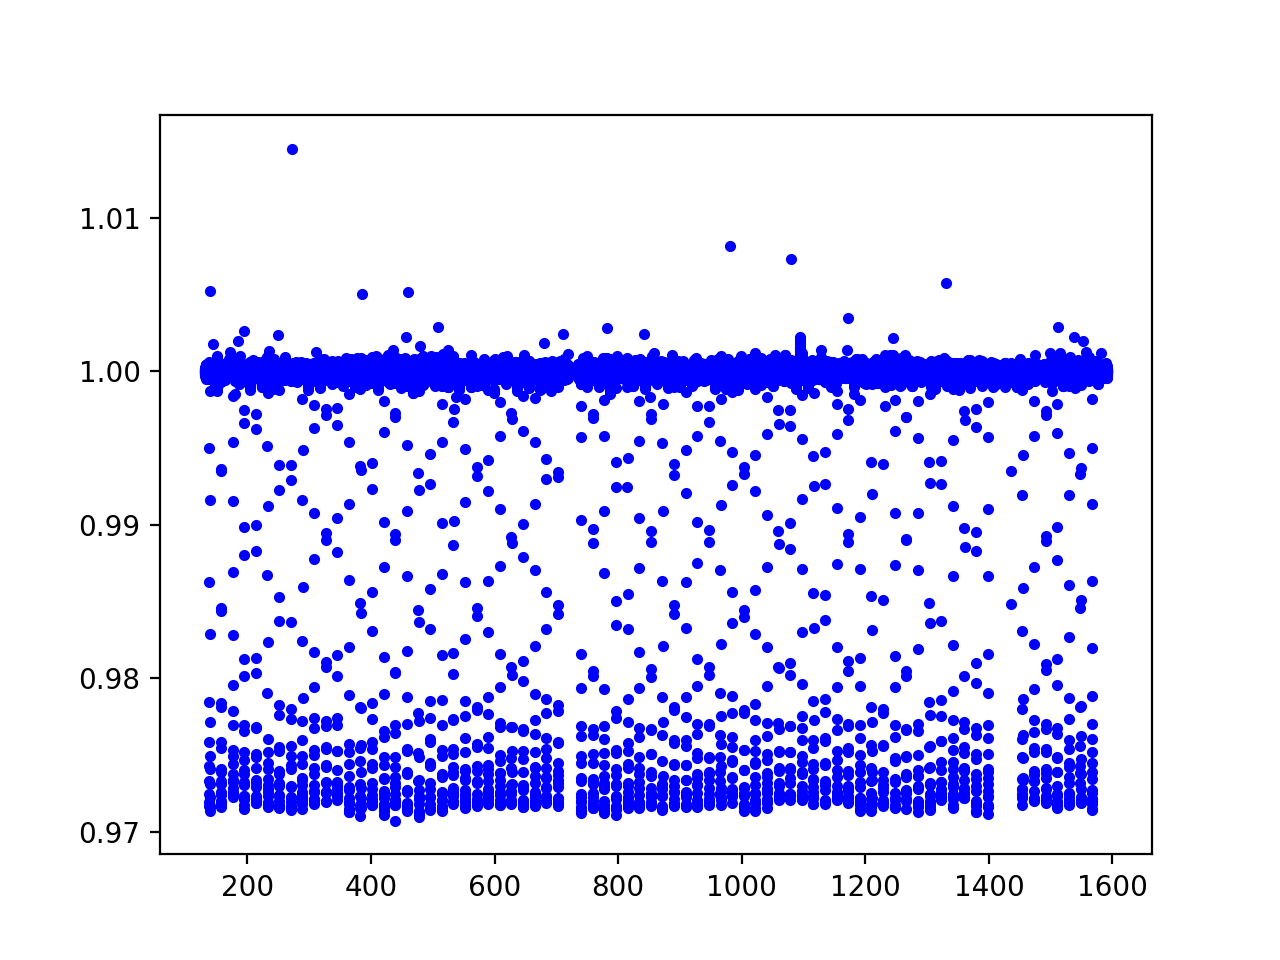

<IPython.core.display.Javascript object>


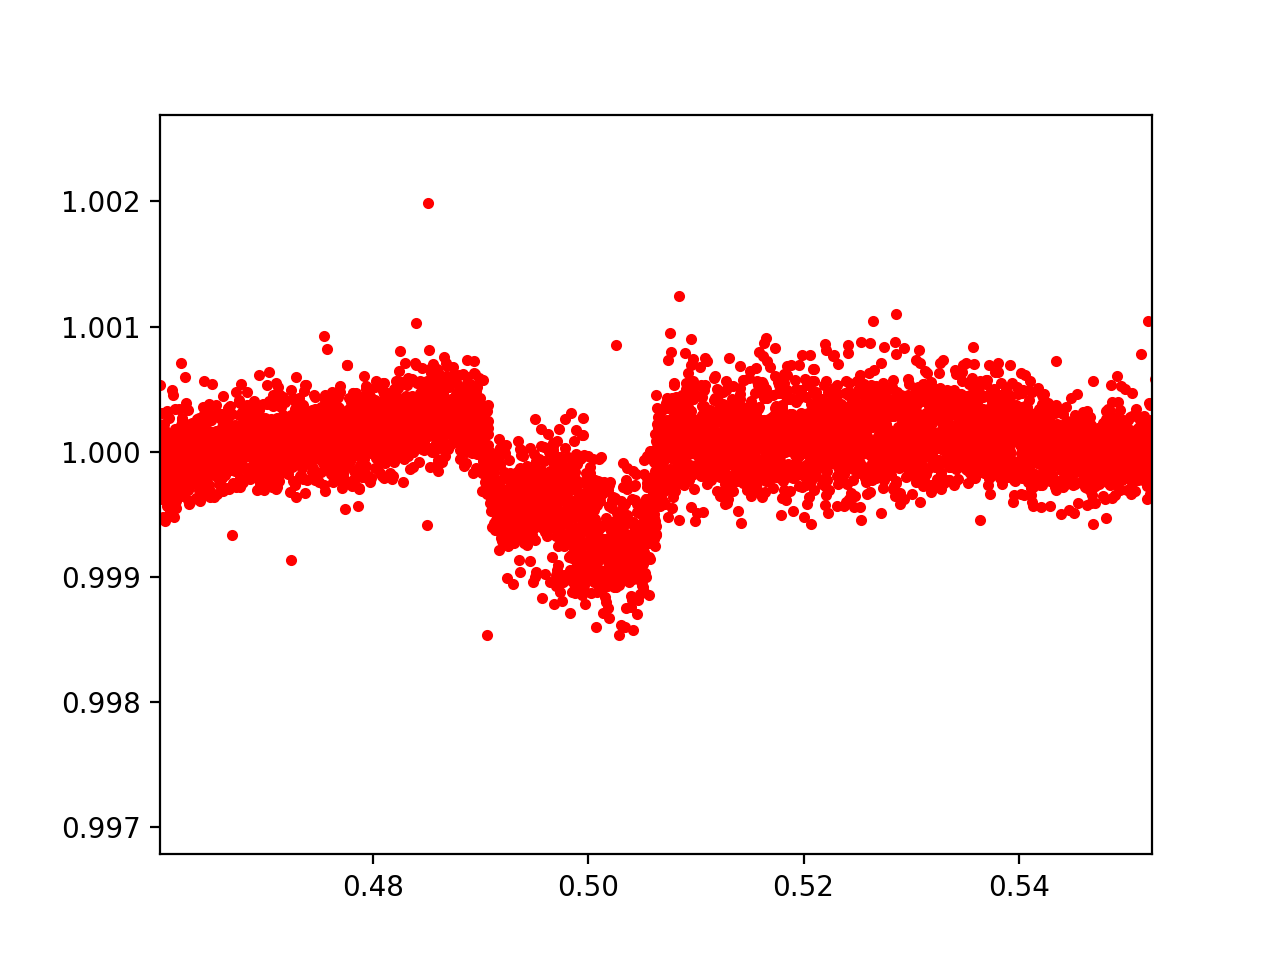

In [6]:
#remove specific time ranges
time, flux, err = lcf[:,0], lcf[:,1], lcf[:,2]

#timecut = np.min(np.where(time>135)) #removes first extra deep binary eclipse
#time, flux, err = time[timecut:], flux[timecut:], err[timecut:]

#tmin = 1126.
#tmax = 1127.5
#cut = (time>tmin) & (time<tmax) & ((flux>1.002) | (flux<0.9988))
#time, flux, err = time[~cut], flux[~cut], err[~cut]
#tmin = 164.8
#tmax = 165.1
#cut = (time>tmin) & (time<tmax) & ((flux>1.002) | (flux<0.9988))
#time, flux, err = time[~cut], flux[~cut], err[~cut]
#tmin = 602.08
#tmax = 603.05
#cut = (time>tmin) & (time<tmax)
#time, flux, err = time[~cut], flux[~cut], err[~cut]

p.figure()
p.plot(time,flux,'b.')


phase = np.mod(time-t_t0[0],t_per[0])/t_per[0]
p.figure()
p.plot(phase,flux,'r.')


In [7]:
output = np.zeros(len(time))
output = np.array([time,flux,err]).T
np.savetxt('K38_clean_withecl.txt',output)

<IPython.core.display.Javascript object>


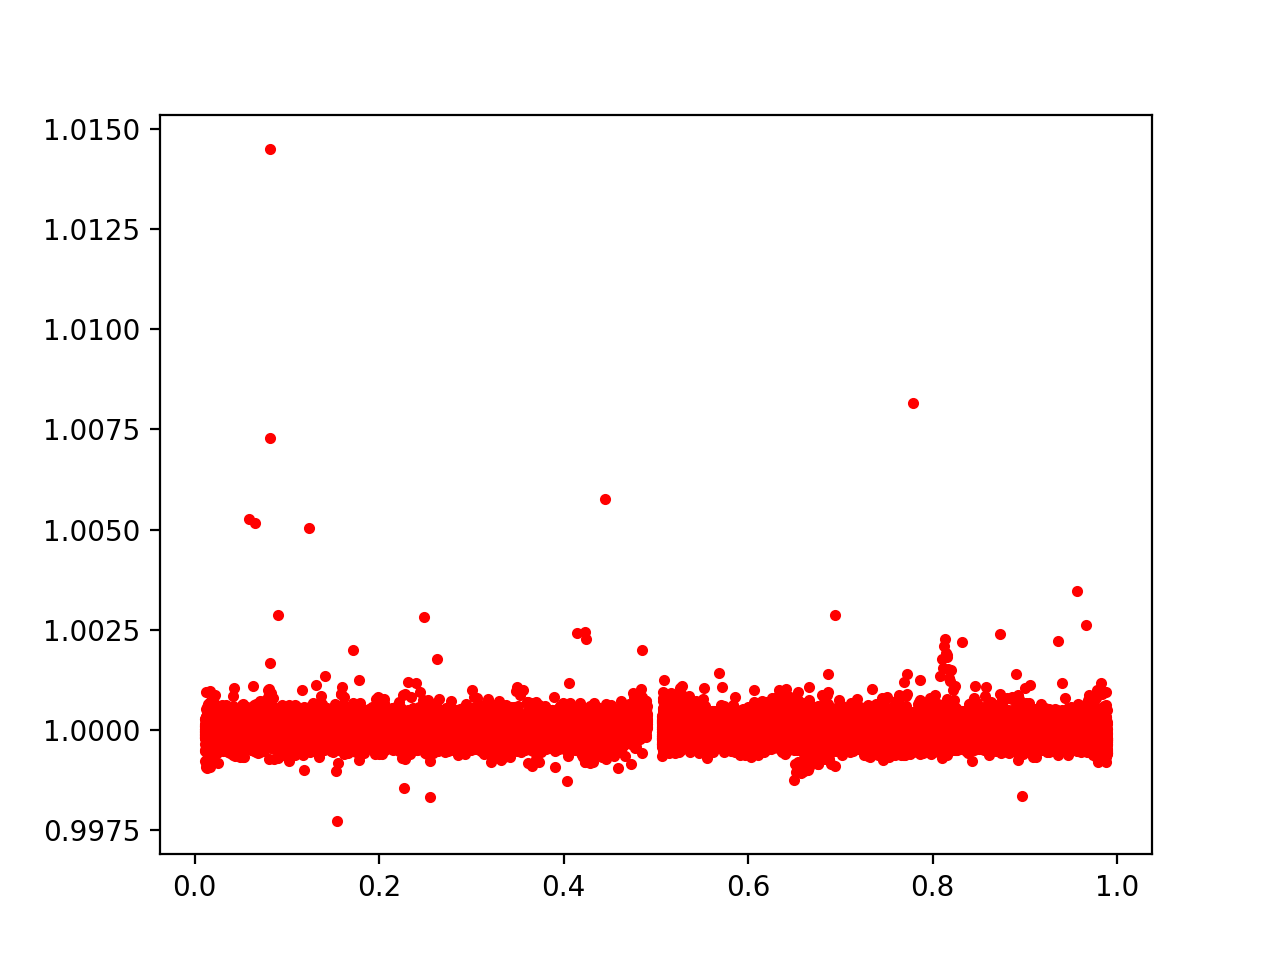

In [13]:
#cut eclipses from the lightcurve:

pri_phase = 0.01121 #in phase (half of eclipse, assumes centred at 0)
sec_start = 0.4899
sec_end = 0.5063

cut = (phase<pri_phase) | (phase > (1-pri_phase)) | ( (phase>sec_start) & (phase<sec_end) )
time, flux, err, phase = time[~cut], flux[~cut], err[~cut], phase[~cut]

p.figure()
p.plot(phase,flux,'r.')

In [15]:
#save lightcurve for other search tests

output = np.zeros(len(time))
output = np.array([time,flux,err]).T
np.savetxt('K38_clean_noecl.txt',output)